In [1]:
# Purpose is to change the global coupling (gain) and change the thalamoconnectivity 
# First try changing the gain and compare the FC and SC and plot it as a function of global variability

%pylab nbagg
from tvb.simulator.lab import *
from tvb.simulator.plot.phase_plane_interactive import PhasePlaneInteractive
import numpy as np
import matplotlib.pyplot as plt
import tvb.analyzers.correlation_coefficient as corr_coeff
from tvb.datatypes.time_series import TimeSeriesRegion
import time

# to get an estimate of simulation time use: tic=time.time()
#tic-time.time() 
# Bezgin 2017 Human Brain Mapping for information on the 96 parcellation

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


In [2]:
def run_sim(conn, gain, D, dt=0.5, simlen=1e3):
    """
    Run a single instance of the simulation.
    Returns a list of pairs (times, values). There will be one entry
    in the list for each output monitor used.
    """
    mon_raw = monitors.Raw()
    mon_tavg = monitors.TemporalAverage(period=5.0)#period=2**-2)
    #Bundle them
    what_to_watch = (mon_tavg, mon_raw)
    
    
    sim = simulator.Simulator(
        
        model=models.Generic2dOscillator(a=0.0),
        # Change the Conn matrix here; make it twice as large three times as large
        connectivity=conn,  # use the connectivity structure defined below
        #coupling=coupling.PreSigmoidal(H=gain,theta=0.0,dynamic=False), # parameters?
        coupling=coupling.Linear(a=gain),
        integrator=integrators.HeunStochastic(dt=dt,
                           noise=noise.Additive(nsig=np.array([D]))),
        monitors = what_to_watch
    )
    sim.configure()
    
    #Perform the simulation
    res = sim.run(simulation_length=simlen)
    (tavg_time,tavg_dat),(raw_time,raw_dat) = res
    
    return sim,tavg_time,tavg_dat,raw_time,raw_dat


In [3]:
# Run the simulation

# using the gain parameter specified on the command line,
# run one instance of the simulation
# the label is there simply to allow running multiple of these in parallel
# without clobbering each other's output files
burnin=500
d = {}
Rand=np.array([[80,49,50,1,7,79],[82,7,49,1,49,82],[92,2,7,7,51,50],[92,79,13,49,51,61],[44,13,79,80,34,1],[3,32,49,50,82,50],[51,1,51,80,82,7],[61,32,82,7,3,79],[82,7,51,34,49,82],[34,34,50,7,34,44]])
Index=9
w=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1,1.5,2.0]
g=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
raw_show={}
tic=time.time()
for i in range(len(g)):
    for j in range(len(w)):
        conn=connectivity.Connectivity.from_file('connectivity_96.zip')
        # thalamocortical connections
        #conn.weights[[41, 42, 43, 89, 90, 91],:] = conn.weights[[41, 42, 43, 89, 90, 91],:]*w[j]
        #conn.weights[:, [41, 42, 43, 89, 90, 91]] = conn.weights[:, [41, 42, 43, 89, 90, 91]]*w[j]
        # Some random connections from a uniform distribution
        conn.weights[Rand[Index,:],:] = conn.weights[Rand[Index,:],:]*w[j]
        conn.weights[:,Rand[Index,:]] = conn.weights[:, Rand[Index,:]]*w[j]
        conn.configure()
        sim,tavg_time,tavg_dat,raw_time,raw_dat = run_sim(conn, g[i], 5e-4, simlen=1e3)
        # reshape the data which are output with some empty dimensions
        raw_timep=raw_time[burnin:,]
        raw = raw_dat
        # calculate global variance
        raw = raw[:,0,:,0]
        simdata=raw[burnin:,:] # remove the burnin period
        g[i]=round(g[i],2)
        VAR=np.var(simdata)
        d[g[i],w[j]] = VAR
        raw_show[g[i],w[j]]=raw_dat[burnin:,:,:,:]
'simulation required %0.3f seconds.' % (time.time() - tic, )
print(d)
print(simdata.shape)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'hemispheres' not fo

/Users/RChenLab/Documents/TVB_Distribution/tvb.app/Contents/Resources/lib/python2.7/tvb/simulator/models/oscillator.py:417: RuntimeWarning: overflow encountered in _numba_dfun_g2d
  self.beta, self.alpha, self.gamma, lc_0)
/Users/RChenLab/Documents/TVB_Distribution/tvb.app/Contents/Resources/lib/python2.7/tvb/simulator/models/oscillator.py:417: RuntimeWarning: invalid value encountered in _numba_dfun_g2d
  self.beta, self.alpha, self.gamma, lc_0)
/Users/RChenLab/Documents/TVB_Distribution/tvb.app/Contents/Resources/lib/python2.7/tvb/simulator/models/oscillator.py:413: RuntimeWarning: invalid value encountered in multiply
  lc_0 = local_coupling * vw[0, :, 0]


{(0.0, 0.4): 0.032085643042661163, (0.0, 0.6): 0.032085643042661163, (0.2, 1.5): 2.496420719550835, (0.0, 0.2): 0.032085643042661163, (0.3, 0.4): 3.4895931877316402, (0.2, 0.0): 3.0198277431751386, (1.0, 0.2): 4.9431874282430739, (0.1, 0.8): 1.2256839841897735, (0.6, 0.4): 4.735965118056658, (0.5, 1): 4.8808074557396761, (0.8, 2.0): 4.9428199573082177, (0.3, 2.0): 3.6658856253123524, (0.2, 1): 2.4186270109752348, (0.8, 0.3): 4.2917685713850888, (0.2, 0.8): 2.399755949873331, (0.0, 1): 0.032085643042661163, (0.6, 2.0): 4.7461393378694083, (0.5, 0.8): 4.9333554376175339, (0.6, 0.0): 6.3729784214893979, (0.6, 0.3): 4.8092127082688565, (0.2, 2.0): 2.6033554716055205, (0.3, 0.8): 3.4497620757716292, (0.1, 0.5): 1.2512895198521834, (0.4, 0.8): 4.4004508530773085, (0.0, 0.3): 0.032085643042661163, (0.5, 0.4): 5.0507177836161707, (0.5, 1.5): 4.7981832794190424, (0.8, 0.0): 5.7429898442887417, (0.6, 1): 4.6081287811966885, (0.3, 0.6): 3.4525524361437054, (0.8, 0.8): 4.1901369633766672, (0.4, 0.

In [4]:
# now plot as a function of gain
#figure()
#plt.bar(range(len(g)), d.values(), align='center')
#plt.xticks(range(len(d)), d.keys())
#show()

In [5]:
Rand[Index,:]

array([34, 34, 50,  7, 34, 44])

<IPython.core.display.Javascript object>


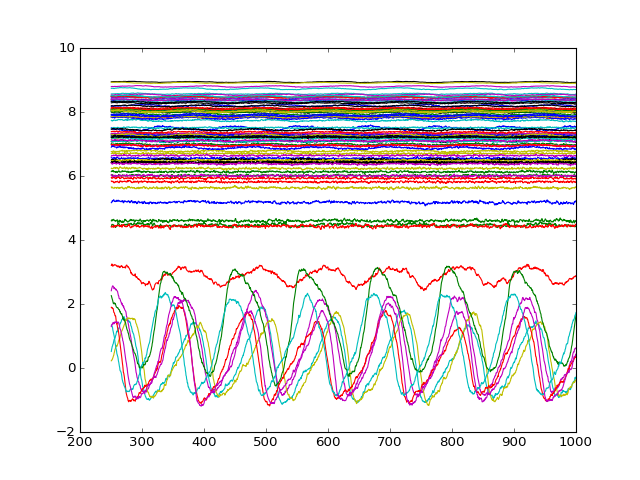

In [6]:
# choose data for which coupling you want to visualize (show time series) and compute correlation coefficient
RAW=raw_show[0.4,2]
figure()
plot(raw_timep, RAW[:,0,:,0])
show()

In [7]:
def compare_con(gain,Weight,RAW, index):
    data_show=RAW[gain,Weight]
    # compute functional connectivity using analyzer
    tsr = TimeSeriesRegion(connectivity=sim.connectivity,
                           data=data_show,
                           sample_period=sim.monitors[0].period)
    tsr.configure()
    corrcoeff_analyser = corr_coeff.CorrelationCoefficient(time_series=tsr)
    corrcoeff_data = corrcoeff_analyser.evaluate()
    corrcoeff_data.configure()
    FC = corrcoeff_data.array_data[..., 0, 0]
    # plot
    #figure(figsize=(10, 4))
    conn=connectivity.Connectivity.from_file('connectivity_96.zip')
    #subplot(121), imshow(conn.weights, cmap='binary', interpolation='none')
    #subplot(122), imshow(FC, cmap='binary', interpolation='none');
    import scipy.io as sio
    sio.savemat('/Users/RChenLab/Documents/TVB_Distribution/demo_scripts/Github/ThalCorProject/FC_LoopGainRandom'+str(gain)+'Weight'+str(Weight)+'IndexRand'+str(index)+'.mat',{'data_struct':FC})
    #plt.colorbar()
    #show()
    return data_show

In [8]:
for i in range(len(g)):
    for j in range(len(w)):
        data_show=compare_con(g[i],w[j],raw_show,Index)
        
#data_show=compare_con(0.8,1.5,raw_show)
#data_show.shape

data_reshaped=data_show[:,0,:,0]


   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not fo

WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.
   INFO  result shape will be: (96, 96, 1, 1)
WARNING  File 'hemispheres' not found in ZIP.


In [9]:
#Figure()
#plot_tri_matrix(sim.connectivity.weights,
#                cmap=pyplot.cm.RdYlBu_r, 
#                node_labels= sim.connectivity.region_labels,
#                size=[10., 10.],
#                color_anchor=(-1.0, 1.0));
#show()